# DS 2500 HW 3

Due: Fri Feb 24 @ 11:59PM

### Submission Instructions
Please submit both of the following to the corresponding [gradescope](https://www.gradescope.com/courses/478298) assignment:
- this `.ipynb` file 
    - give a fresh `Kernel > Restart & Run All` just before uploading
- a `.py` file consistent with your `.ipynb`
    - `File > Download as ...`
    
Gradescope may run your `.py` submission to determine part of your score for this assignment.  See the [autograder instructions](https://github.com/matthigger/gradescope_auto_py/blob/main/stud_instruct.md) for details.


### Tips for success
- Start early
- Make use of [Piazza](https://course.ccs.neu.edu/ds2500/admin_piazza.html)
- Make use of [Office Hours](https://course.ccs.neu.edu/ds2500/office_hours.html)
- Remember that [Documentation / style counts for credit](https://course.ccs.neu.edu/ds2500/python_style.html)
- [No student may view or share their ungraded homework with another](https://course.ccs.neu.edu/ds2500/syllabus.html#academic-integrity-and-conduct)

# Part 1: Plotting `Shape` objects `Rectangle` and `Circle`

### Brief background: Plotting Patches in Matplotlib

The syntax below shows how to plot "patch" objects in matplotlib.  

Please modify inputs to `patches.Circle` and `patches.Rectangle` to ensure you understanding the meaning of each before proceeding.

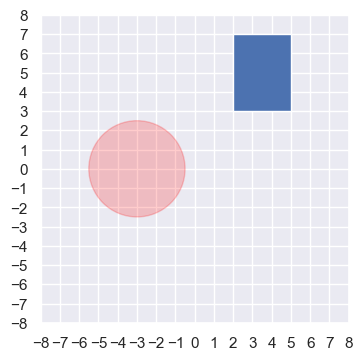

In [14]:
from hw3_helper import get_new_figure
from matplotlib import patches

# build a new figure
fig, ax = get_new_figure()

# add a circle to this figure
patch_circle = patches.Circle((-3, 0), radius=2.5, alpha=.2, color = 'red')
ax.add_patch(patch_circle)

# add a rectangle to same figure
patch_rect = patches.Rectangle((2, 3), height=4, width=3, angle=0)
ax.add_patch(patch_rect)

## Your work here

In [2]:
# when complete, the code in this cell is all thats required to answer all subparts
# (no need to modify any of the test cases in subparts below)

# starter code:
class Shape:
    """creates a shape
    
    Attributes:
        pos_tuple (tuple): the starting position of the shape
        color (string): sets the color of the shape
        alpha (float): sets the transparency of the shape, is between 0 and 1, higher alpha means higher opacity
    """
    def __init__(self, pos_tuple=(0, 0), color='black', alpha=1):
        
        self.pos_tuple = pos_tuple
        self.color = color
        self.alpha = alpha
    
    def offset(self, x_diff=0, y_diff=0):
        """moves the shape
        
        Args:
            x_diff (float): how the shape moves on the x-axis
            y_diff (float): how the shape moves on the y-axis
        """
        #get the new position of the shape
        self.pos_tuple = (self.pos_tuple[0] + x_diff, self.pos_tuple[1] + y_diff)
        


class Circle(Shape):
    """creates a circle, subclass of Shape
    
    Attributes:
        radius (float): the radius of the circle, must be >0
    """
    def __init__(self, pos_tuple=(0,0), radius=1, color='black', alpha=1):
        super().__init__(pos_tuple=pos_tuple, color=color, alpha=alpha)
        
        #make sure the radius is >0
        assert radius > 0, 'radius must be greater than 0'
        
        self.radius = radius
    
    def plot(self, ax):
        """plots the circle
        
        Args:
            ax (subplot): the plot in which the circle is going
        """
        self.ax = ax
        
        #graph the circle
        patch_circle = patches.Circle(xy = self.pos_tuple, radius = self.radius, color = self.color, alpha = self.alpha)
        self.ax.add_patch(patch_circle)
        
    def scale(self, scale):
        """scales the circle
        
        Args:
            scale (float): the value by which the circle is being scaled by
        """
        self.radius = self.radius * scale

class Rectangle(Shape):
    """creates a rectangle, subclass of Shape
    
    Attributes:
        angle (float): the angle, in degrees, the rectangle rotates counter-clockwise 
                       from its starting position, is between 0 and 360
        height (float): the height of the rectange, measured from the starting positon, must be >0
        width (float): the width of the rectangle, measured from the starting positon, must be >0
    """
    def __init__(self, pos_tuple=(0,0), height=1, width=1, color='black', alpha=1, angle=0):
        super().__init__(pos_tuple=pos_tuple, color=color, alpha=alpha)
        
        assert height > 0 and width > 0, 'the height and width must be greater than 0'
        
        self.height = height
        self.width = width
        self.angle = angle
            
    def plot(self, ax):
        """plots the rectangle
        
        Args:
            ax (subplot): the plot in which the rectangle is going
        """
        self.ax = ax
        
        #graph the rectangle
        patch_rect = patches.Rectangle(xy= self.pos_tuple, height = self.height, width = self.width, 
                                  color = self.color, alpha = self.alpha, angle = self.angle)
        self.ax.add_patch(patch_rect)
        
    def scale(self, scale):
        """scales the rectangle
        
        Args:
            scale (float): the value by which the rectangle is being scaled by
        """
        self.height = self.height * scale
        self.width = self.width * scale

# Part 1.1 (18 points)

Complete:
- `__init__()` methods for all classes above
- `plot()` methods for `Circle` and `Rectangle`

Which attributes belong in which class?
- `pos_tuple` should be a `Shape` attribute
    - `Circle` and `Rectangle` will inherit this attribute automatically
    - "Don't-Repeat-Yourself"
- `radius` should be a `Circle` attribute
    - only `Circle` objects need such a thing
- note: `angle` could be included or excluded from `Circle` for full credit 
    - why include it: `patches.Circle()` accepts an `angle` argument
    - why exclude it: it doesn't really change how a circle is plotted and simple is better

When complete, the code below should produce this image:

<img src="https://i.ibb.co/J2t5jpW/shapes0.png" width=300>


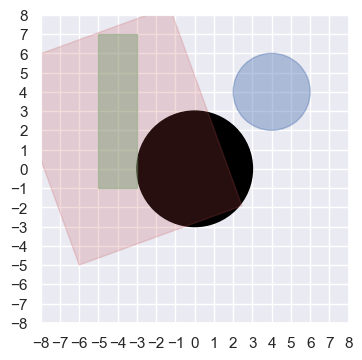

In [3]:
# define shapes
circ0 = Circle(radius=3)
circ1 = Circle(pos_tuple=(4, 4), radius=2, color='b', alpha=.4)
rect0 = Rectangle(pos_tuple=(-5, -1), height=8, width=2, color='g', alpha=.4)
rect1 = Rectangle(pos_tuple=(-6, -5), height=11, width=9, color='r', alpha=.2, angle=20)

# collect them in a tuple 
shape_tup = circ0, circ1, rect0, rect1

# build new figure and plot each shape
fig, ax = get_new_figure()
for shape in shape_tup:
    shape.plot(ax)
    

# Part 1.2 (8 points)

Implement the `offset()` behavior below.

Do we need multiple `offset()` methods with the same inputs / outputs?  Or is there somewhere we can put a single `offset()` method which gets the job done.  (Where possible: Don't-Repeat-Yourself)

When complete, the code below should produce this image:

<img src="https://i.ibb.co/VqzWNJr/shapes1.png" width=300>


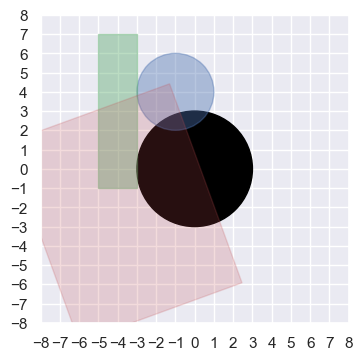

In [4]:
# (re)define shapes
circ0 = Circle(radius=3)
circ1 = Circle(pos_tuple=(4, 4), radius=2, color='b', alpha=.4)
rect0 = Rectangle(pos_tuple=(-5, -1), height=8, width=2, color='g', alpha=.4)
rect1 = Rectangle(pos_tuple=(-6, -5), height=11, width=9, color='r', alpha=.2, angle=20)

# collect them in a tuple 
shape_tup = circ0, circ1, rect0, rect1

# apply offset to the second item in shape_tup (circ1, the blue circle)
shape_tup[1].offset(x_diff=-5)

# apply offset to the last item in shape_tup (rect1, the red rectangle)
shape_tup[-1].offset(y_diff=-4)

# build new figure and plot each shape
fig, ax = get_new_figure()
for shape in shape_tup:
    shape.plot(ax)
    

# Part 1.3 (8 points)

Implement the `scale()` behavior below.

Do we need multiple `scale()` methods with the same inputs / outputs?  Or is there somewhere we can put a single `scale()` method which gets the job done.  (Where possible: Don't-Repeat-Yourself)

When complete, the code below should produce this image:

<img src="https://i.ibb.co/5xJypCp/shapes2.png" width=300>


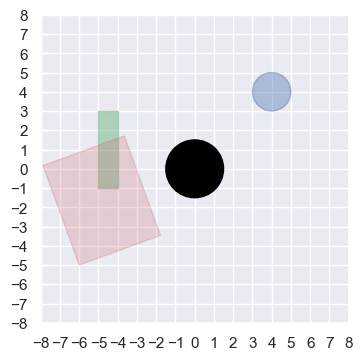

In [5]:
# (re)define shapes
circ0 = Circle(radius=3)
circ1 = Circle(pos_tuple=(4, 4), radius=2, color='b', alpha=.4)
rect0 = Rectangle(pos_tuple=(-5, -1), height=8, width=2, color='g', alpha=.4)
rect1 = Rectangle(pos_tuple=(-6, -5), height=11, width=9, color='r', alpha=.2, angle=20)

# collect them in a tuple 
shape_tup = circ0, circ1, rect0, rect1

# build new figure and plot each shape
fig, ax = get_new_figure()
for shape in shape_tup:
    # shrink object
    shape.scale(.5)
    
    # plot
    shape.plot(ax)
    

# Part 2: `IntFraction`

We build an `IntFraction` class, a fraction whose numerator and denominator are both integers.

A few suggestions / notes:
- complete the parts in the order given
    - some may depend on others and could be helpful
- be sure to study and fully digest the test cases before starting to build
- do not modify the test cases
    - you need not modify anything below "part 2.0" below

In [6]:
# starter code:
import math

class IntFraction:
    """creates a fraction whose numerator and denominators are both integers
    
    Attributes:
        num (int): the numerator of the fraction
        den (int): the denominator of the fraction
    """
    def __init__(self, num, den):
        
        #functionality for negative numbers
        if den < 0:
            num = num * -1
            den = den * -1
        
        
        #make the inputs integers
        num = int(num)
        den = int(den)
        
        #get the simplified fraction using the GCD
        gcd = math.gcd(num, den)
        num = num/gcd
        den = den/gcd
        
        self.num = int(num)
        self.den = int(den)
        
    def __repr__(self):
        return f'IntFraction(num={self.num}, den={self.den})'
    
    @classmethod
    def from_int(self, input_number):
        """creates a fraction from an inputed integer
        
        Args:
            input_number (int): the inputed integer
        """
        return IntFraction(num=input_number, den=1)
    
    def __eq__(self, other):
        """"sees if two IntFractions, or an IntFraction and another number, are equal
        
        Args:
            other (int or IntFraction): the number that is being compared for equality
        """
        #if the type of other is an int, make it an IntFraction
        if type(other) == int:
            other = IntFraction.from_int(other)
        #if other is a string, then IntFraction cannot be equal to it
        elif type(other) == str:
            return False
        
        #if both the numerator and denominator are equal to each other, then the fractions are equal to each other
        if self.num == other.num and self.den==other.den:
            return True

    def __add__(self, other):
        """adds an IntFraction to another number or IntFraction
        
        Args:
            other (int or IntFraction): the number that is being added to the current IntFraction
        """
        #if other is an integer, convert it to IntFraction
        if type(other) == int:
            other = IntFraction.from_int(other)
            
        #find common denominator in order to add fractions
        new_den = self.den * other.den
        
        #multiply numerators by opposite denominator
        new_self_num = self.num * other.den
        new_other_num = other.num * self.den
        
        #create a new IntFraction that is the sum of the other two
        return IntFraction(new_self_num + new_other_num, new_den)
    
    def __mul__(self, other):
        """multiplies two fractions
        
        Args:
            other (int or IntFraction): the number that is being multiplied to the current IntFraction
        """
        #if other is an integer, convert it to IntFraction
        if type(other) == int:
            other = IntFraction.from_int(other)
           
        #return a new object
        return IntFraction(self.num*other.num, self.den*other.den)
        
    def __sub__(self, other):
        """subtracts two fractions
        
        Args:
            other (int or IntFraction): the number that is being subtracted from the current IntFraction
        """
        return self + other * -1
    
    def __truediv__(self, other):
        """divides two fractions
        
        Args:
            other (int or IntFraction): the number that the current IntFraction is being divided by
        """
        #if other is an integer, convert it to IntFraction
        if type(other) == int:
            other = IntFraction.from_int(other)
        
        #switch the numerator and denominator of the other fraction
        new_other_num = other.den
        new_other_den = other.num
        
        return self * IntFraction(new_other_num, new_other_den)
        

## Part 2.0: Documentation of `IntFraction` in all subparts (16 pts)

## Part 2.1 `IntFraction.__init__()` & `IntFraction.__repr__()` (10 auto pts)

In [7]:
one_half = IntFraction(num=1, den=2)

assert one_half.__dict__ == {'num': 1, 'den': 2}, 'attributes set properly (2 pts)'
assert str(one_half) == 'IntFraction(num=1, den=2)', '__repr__() (3 pts)'

one_half_from_float = IntFraction(num=1.0, den=2.0)
assert str(one_half_from_float) == 'IntFraction(num=1, den=2)', '(3 pts)'

assert isinstance(one_half_from_float.num, int), 'num cast to int (1 pts)'
assert isinstance(one_half_from_float.den, int), 'den cast to int (1 pts)'

## Part 2.2 `IntFraction.from_int()` (3 auto + 3 pts)

In [8]:
assert str(IntFraction.from_int(4)) == 'IntFraction(num=4, den=1)', '3 pts'

## Part 2.3 `IntFraction.simplify()` (5 auto + 5 pts)

This can be challenging to build unless you borrow the right function ([gcd()](https://docs.python.org/3/library/math.html#math.gcd) is looking promising here ...).  Don't build what you can borrow :)

In [9]:
assert str(IntFraction(num=100, den=200)) == 'IntFraction(num=1, den=2)', '2.5 pts'
assert str(IntFraction(num=2, den=8)) == 'IntFraction(num=1, den=4)', '2.5 pts'

## Part 2.4 `IntFraction.__eq__()` (6 auto pts)

In [10]:
assert IntFraction(num=1, den=2) == IntFraction(num=1, den=2), '2 pts'
assert IntFraction(num=10, den=2) == 5, '2 pts'
assert IntFraction(num=1, den=2) != 'this isnt even an IntFraction!', '2 pts'

## Part 2.5 `IntFraction.__add__()` (6 auto pts)

In [11]:
half_plus_third = IntFraction(num=1, den=2) + IntFraction(num=1, den=3)
assert half_plus_third == IntFraction(num=5, den=6), '3 pts'

half_plus_int = IntFraction(num=1, den=2) + 1
assert half_plus_int == IntFraction(num=3, den=2), '3 pts'

## Part 2.6 `IntFraction.__mul__()` (6 auto + 6 pts)
Remember, you promised not to repeat yourself when you write software (some of you did so twice! ... thanks for indulging my silly joke).  If you see some behavior here which gives a sense of deja vu, maybe we should define and use a new function.

In [12]:
half_times_third = IntFraction(num=1, den=2) * IntFraction(num=1, den=3)
assert half_times_third == IntFraction(num=1, den=6), '3 pts'

half_times_ten = IntFraction(num=1, den=2) * 10
assert half_times_ten == IntFraction(num=5, den=1), '3 pts'

## Part 2.7 (3 auto-extra-credit pts)

- (+1) Extend support for `IntFracion` to negative numbers
- (+1) `IntFraction.__sub__()`
- (+1) `IntFraction.__truediv__()`

Remember, don't repeat yourself in `__sub__()` or `__truediv__()`

In [13]:
# extra credit asserts:
# __init__ finds a consistent representation of positive & negative fractions (den never negative)
assert str(IntFraction(num=-1, den=-2)) == 'IntFraction(num=1, den=2)', '.334 pts'
assert str(IntFraction(num=-1, den=2)) == 'IntFraction(num=-1, den=2)', '.334 pts'
assert str(IntFraction(num=1, den=-2)) == 'IntFraction(num=-1, den=2)', '.334 pts'

# __sub__
assert str(IntFraction(num=1, den=2) - IntFraction(num=1, den=3)) == 'IntFraction(num=1, den=6)', '.5 pts'
assert str(IntFraction(num=1, den=2) - 3) == 'IntFraction(num=-5, den=2)', '.5 pts'


# __truediv__ 
assert str(IntFraction(num=1, den=2) / 3) == 'IntFraction(num=1, den=6)', '.5 pts'
assert str(IntFraction(num=1, den=2) / IntFraction(num=1, den=4)) == 'IntFraction(num=2, den=1)', '.5 pts'